### 15.3.1 傅里葉變換

[ 1.34992672+0.j         -0.09526905-0.14569535j -0.03664114-0.12007802j
 -0.2670005 +0.24512406j -0.10075074+0.0314084j  -0.26409417+0.04197159j
  0.14411338+0.18703009j  0.07467991+0.05367644j -0.26663142+0.15324939j
  0.03248223+0.14130114j]


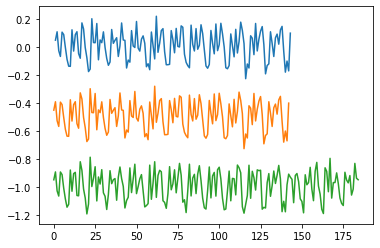

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 將頻域數據轉換成時序數據
# bins爲頻域數據，n設置使用前多少個頻域數據，loop設置生成數據的長度
def fft_combine(bins, n, loops=1):
    length = int(len(bins) * loops)
    data = np.zeros(length)
    index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
    for k, p in enumerate(bins[:n]):
        if k != 0 : p *= 2 # 除去直流成分之外, 其餘的係數都乘2
        data += np.real(p) * np.cos(k*index) # 餘弦成分的係數爲實數部分
        data -= np.imag(p) * np.sin(k*index) # 正弦成分的係數爲負的虛數部分
    return index, data

if __name__ == '__main__':
    data = pd.read_csv('AirPassengers.csv')
    ts = data['#Passengers']

    # 平穩化
    ts_log = np.log(ts)
    ts_diff = ts_log.diff(1) # 差分
    ts_diff = ts_diff.dropna() # 去除空數據
    fy = np.fft.fft(ts_diff)
    print(fy[:10]) # 顯示前10個頻域數據
    conv1 = np.real(np.fft.ifft(fy)) # 逆變換
    index, conv2 = fft_combine(fy / len(ts_diff), int(len(fy)/2-1), 1.3) # 只關心一半數據
    plt.plot(ts_diff)
    plt.plot(conv1 - 0.5) # 爲看清楚，將顯示區域下拉0.5
    plt.plot(conv2 - 1)
    plt.show()

### 15.3.2小波變換

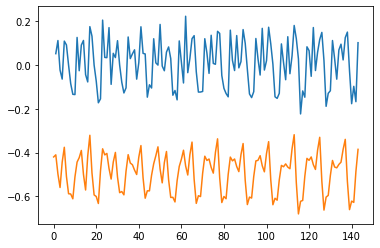

In [2]:
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('AirPassengers.csv')
ts = data['#Passengers']
ts_log = np.log(ts)
ts_diff = ts_log.diff(1) 
ts_diff = ts_diff.dropna() 

cA,cD = pywt.dwt(ts_diff, 'db2')
cD = np.zeros(len(cD))
new_data = pywt.idwt(cA, cD, 'db2')

plt.plot(ts_diff)
plt.plot(new_data - 0.5) 
plt.show()